<a href="https://colab.research.google.com/github/luthf-ai/seni_komputer/blob/main/week07/week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

**Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi**

##Kelompok:
####- Aido Lutfhi AL Hakim | 2141720136
####- Jauhar Maulana A'la | 2141720186
####- Naufal Falah Wafiuddin | 2141720129
Link Github : https://github.com/luthf-ai/seni_komputer

## **Praktikum**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:




#### **Mount Google Drive**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### **Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

### **Konvolusi tanpa Library**

**Membuat fungsi konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

In [4]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [5]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)



---
3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

#### **Sharpen**

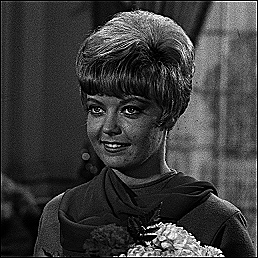

In [28]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

#### **Emboss**

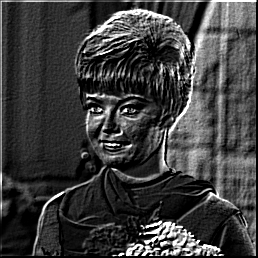

In [7]:
kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

#### **Left Sobel Edge Detection**

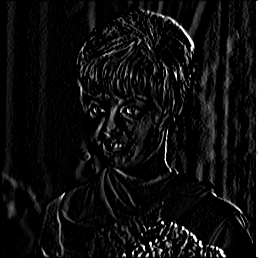

In [8]:
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

#### **Canny Edge Detection**

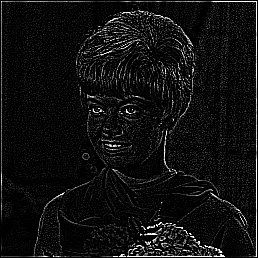

In [9]:
kernel_canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

#### **Prewitt Edge Detection**

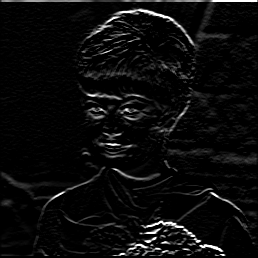

In [10]:
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

#### **5x5 Gaussian Blur**

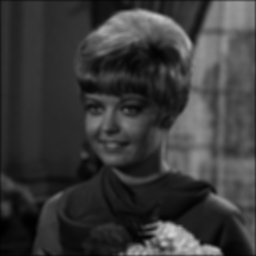

In [11]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

#### **21x21 Gaussian Blur**

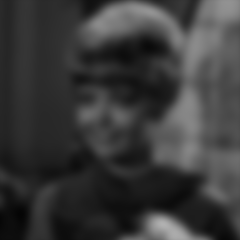

In [12]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

---


## **Tugas Praktikum**

Diketahui *`dataset KTP`* dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

#### **Membuat fungsi Brightness, histogram equalization, conv2d**

In [14]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image
def hist_equ (image):
  channels = cv.split(image)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))

  eq_image = cv.merge(eq_channels)

  return eq_image

def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

#### **Proses KTP 1**

In [15]:
ktp1 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

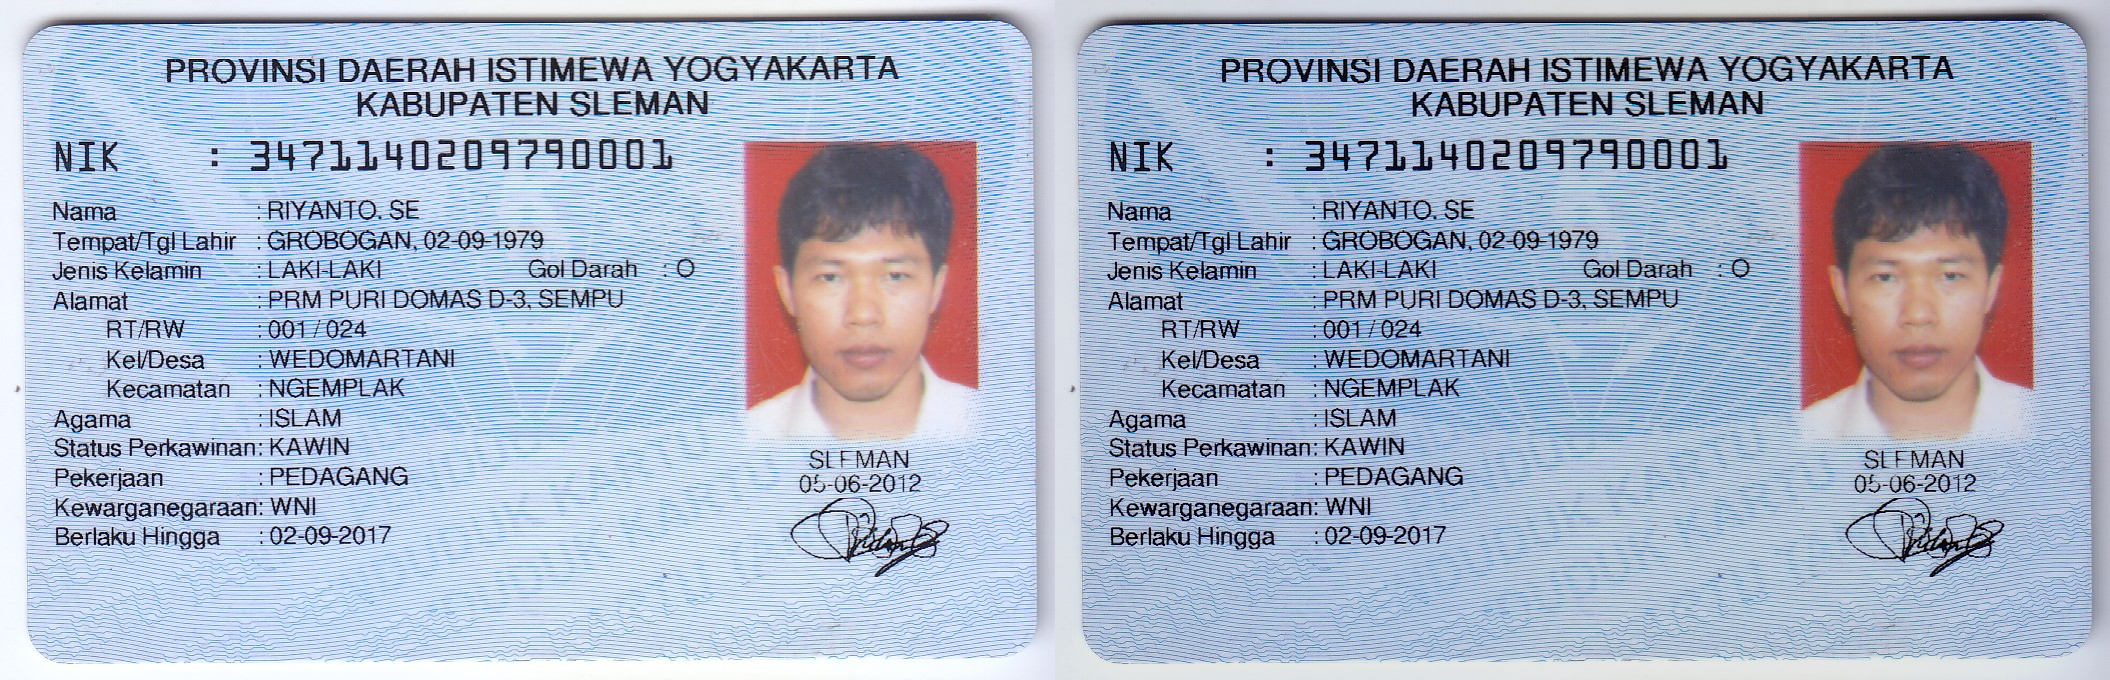

In [16]:
kernel_size = 5
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()

result_brightness = Brightness(ktp1, -25)

result = conv2d(result_brightness, gauss_kernel,1)

final_frame = cv.hconcat((ktp1, result))
cv2_imshow(final_frame)

#### **Proses KTP 2**

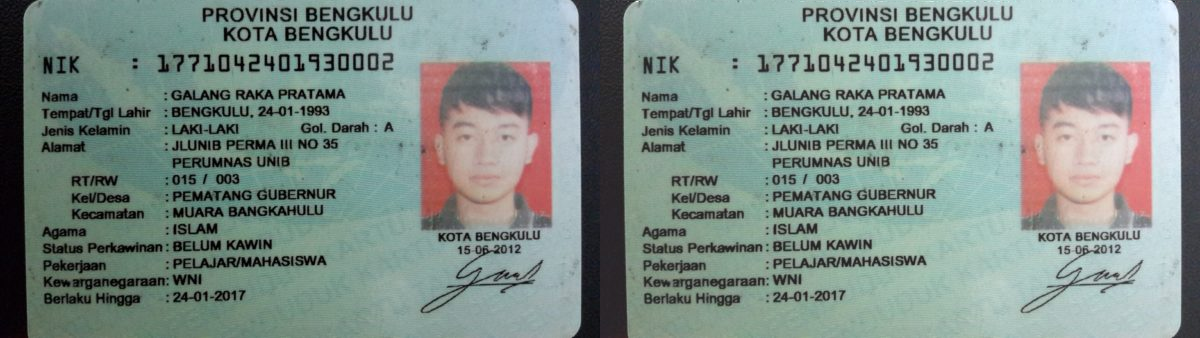

In [17]:
ktp2 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')
result = conv2d(ktp2, kernel_sharpen,1)
brightness = Brightness(result, 35)
final_frame = cv.hconcat((ktp2, brightness))
cv2_imshow(final_frame)

#### **Proses KTP 3**

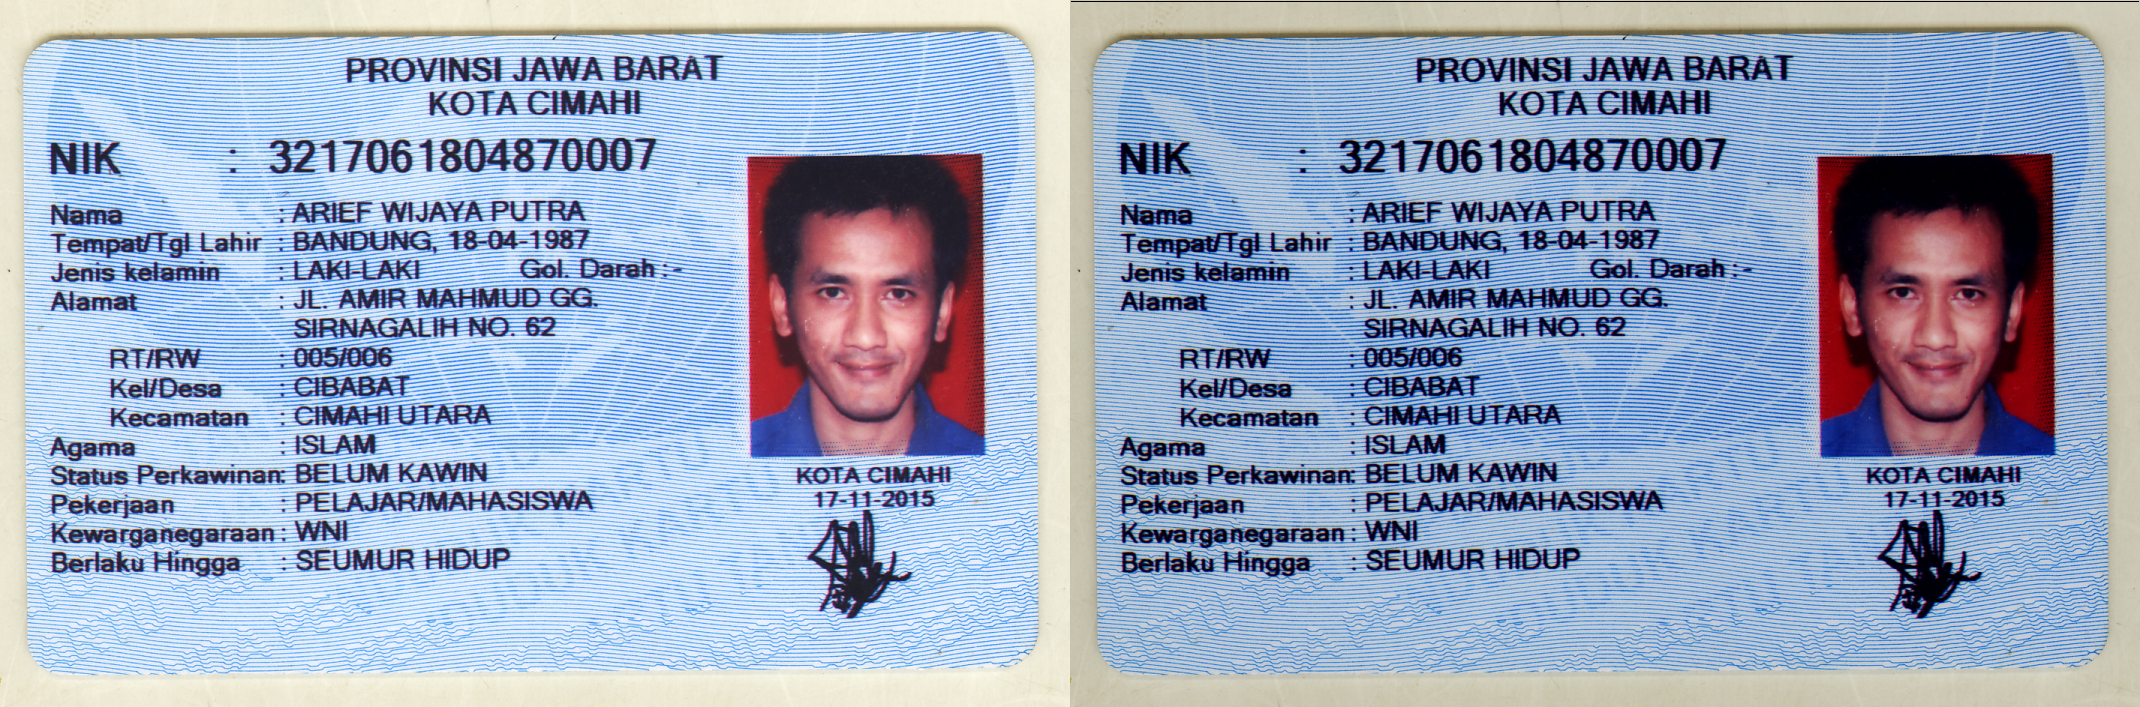

In [19]:
ktp3 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp2.png')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

result = conv2d(ktp3, kernel_lsed,1)
brightness = Brightness(result, -35)
final_frame = cv.hconcat((ktp3, brightness))
cv2_imshow(final_frame)

#### **Proses KTP 4**

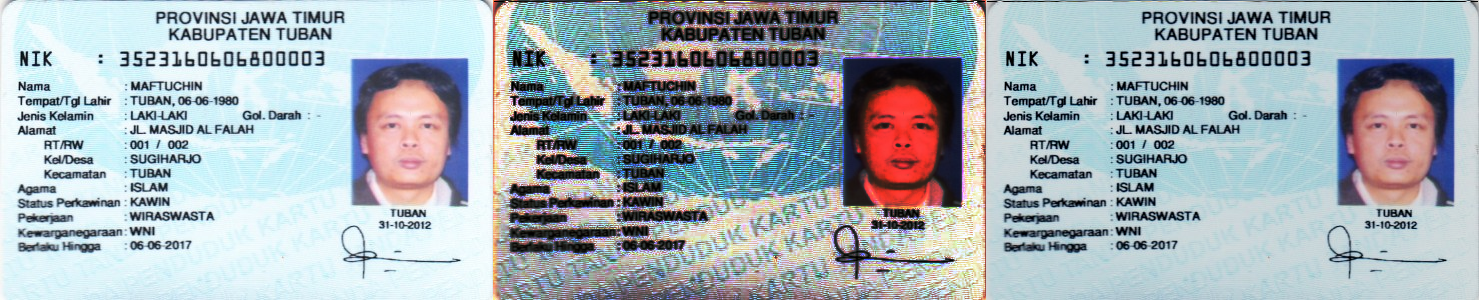

In [23]:
ktp4 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

# cv2_imshow(ktp4)
kernel_ped = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]], dtype=np.float32)

result = conv2d(ktp4, kernel_ped,1)
hist = hist_equ(result)
brightness = Brightness(result, -35)
final_frame = cv.hconcat((ktp4, hist, brightness))
cv2_imshow(final_frame)

#### **Proses KTP 5**

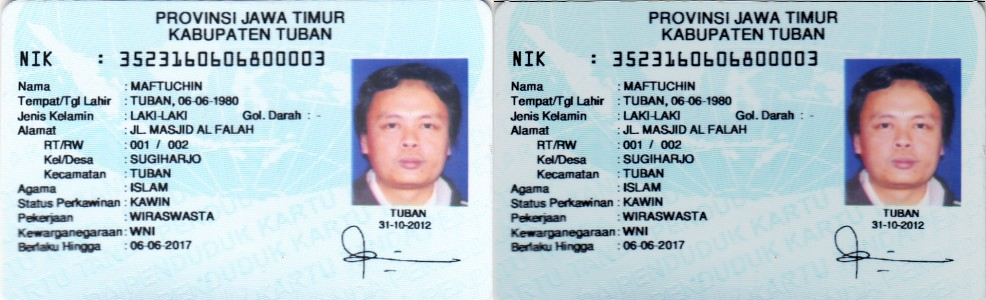

In [22]:
ktp5 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')

kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]], dtype=np.float32)

result = conv2d(ktp5, kernel_sharpen,1)
ced = conv2d(result, kernel_ped,1)
brightness = Brightness(ced, -30)
final_frame = cv.hconcat((ktp5, brightness))
cv2_imshow(final_frame)

#### **Proses KTP 6**

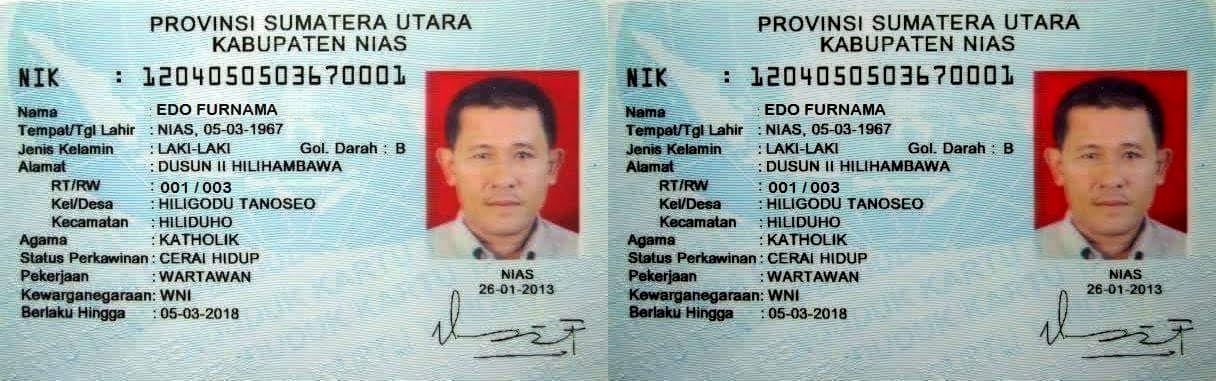

In [24]:
ktp6 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp5.png')

kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()

result = conv2d(ktp6, gauss_kernel,1)
brightness = Brightness(result, -30)
final_frame = cv.hconcat((ktp6, brightness))
cv2_imshow(final_frame)

#### **Proses KTP 7**

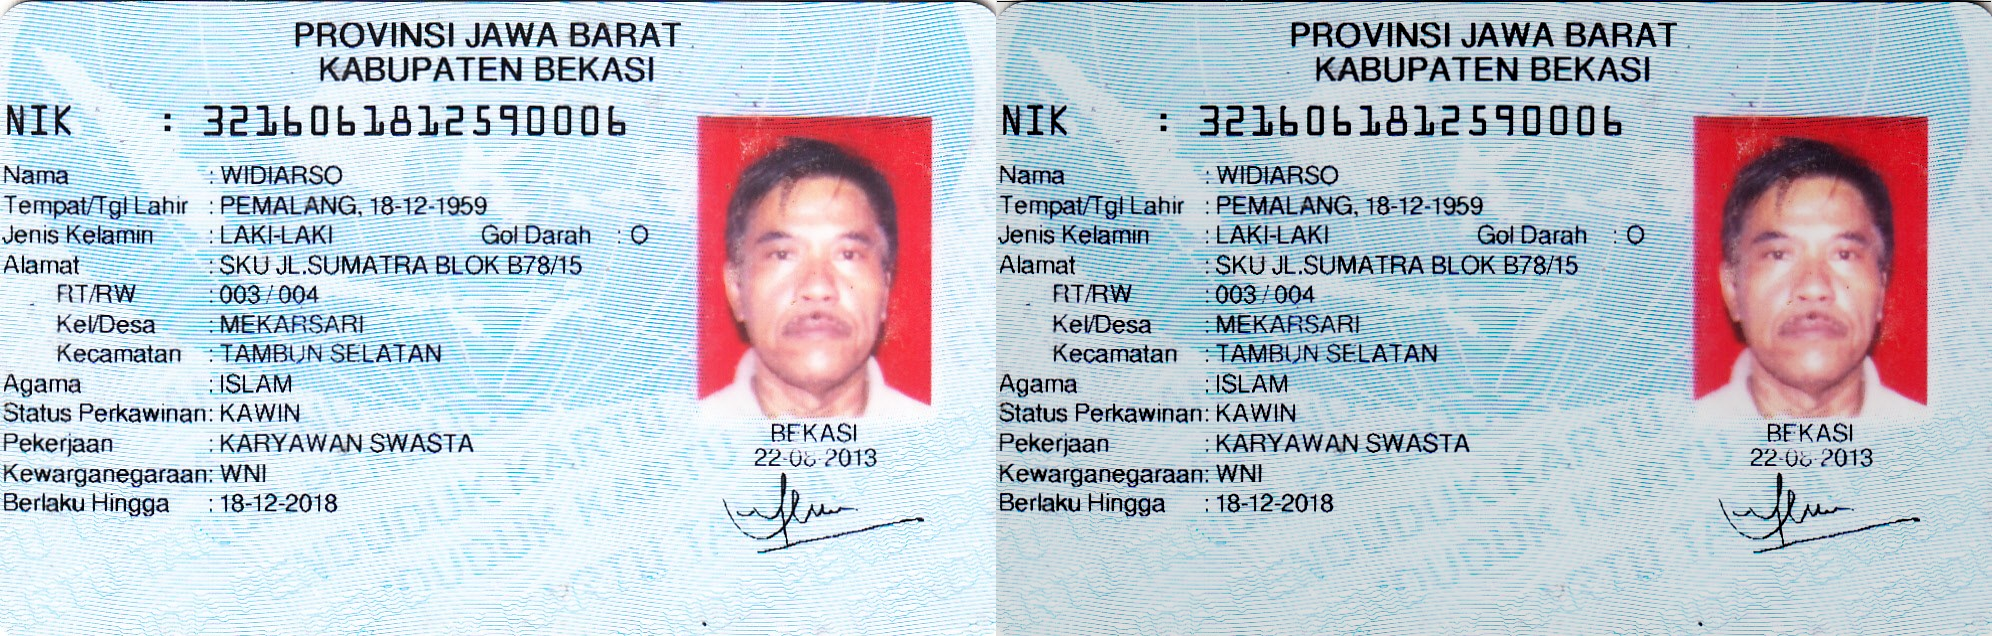

In [25]:
ktp7 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp6.png')

result = conv2d(ktp7, kernel_lsed,1)
brightness = Brightness(result, -30)
final_frame = cv.hconcat((ktp7, brightness))
cv2_imshow(final_frame)

#### **Proses KTP 8**

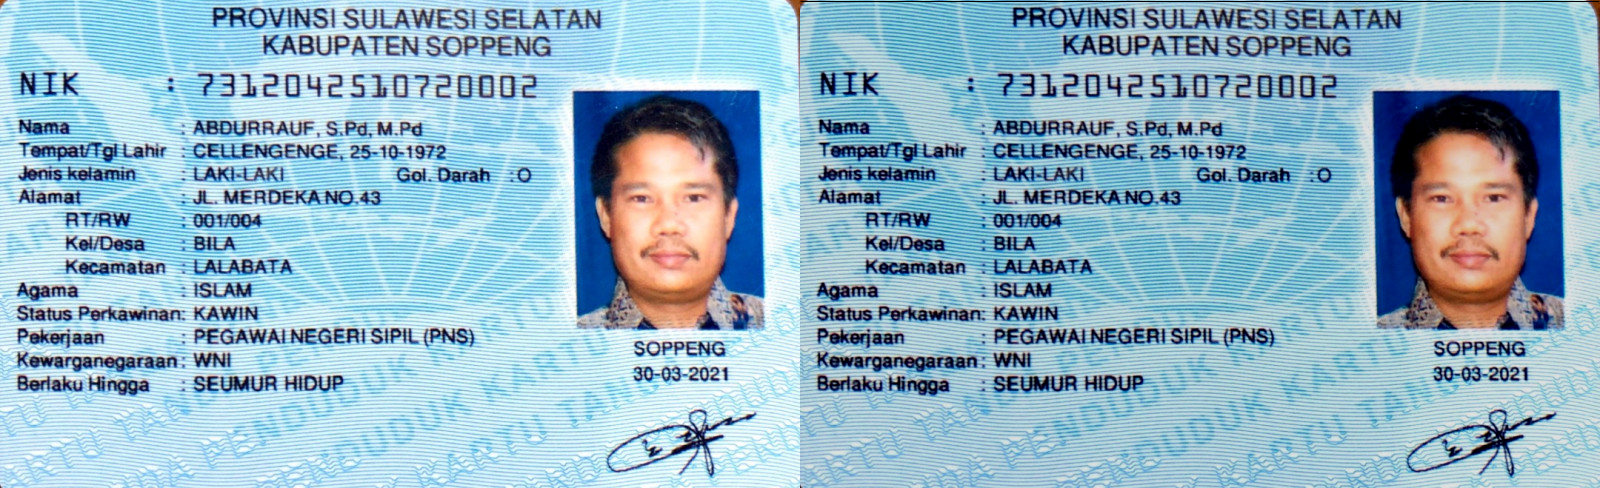

In [31]:
ktp8 = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP7.jpeg')

result = conv2d(ktp8, kernel_lsed,1)
brightness = Brightness(result, -30)
final_frame = cv.hconcat((ktp8, brightness))
cv2_imshow(final_frame)